#### Data Read

In [298]:
import pandas as pd
# Load data file
df_data = pd.read_excel(r"RV01-Data_Input.xlsx")
print(f'Total rows in the file - {df_data.shape[0]}')
print(df_data.head())

Total rows in the file - 1473
   CitizenSN Migration  Gender Age  Salary  Travel_Habits  \
0     100001       Yes  Female  41    1102  Travel-Seldom   
1     100002        No    Male  49     279   Travel-Often   
2     100004       Yes    Male  37    1373  Travel-Seldom   
3     100005        No  Female  33    1392   Travel-Often   
4     100007        No    Male  27     591  Travel-Seldom   

                 Job_Type  Commute_Factor  Education EducationArea  ...  \
0                   Sales               1          2       Science  ...   
1  Research & Development               8          1       Science  ...   
2  Research & Development               2          2         Other  ...   
3  Research & Development               3          4       Science  ...   
4  Research & Development               2          1       Medical  ...   

   Work_Life_Balance  Years_Without_Major_Change  Years_Without_Minor_Change  \
0                  1                           6                        

#### Data Pre-processing

In [299]:
# Check for missing values
print("Missing Values:\n", df_data.isnull().sum())


Missing Values:
 CitizenSN                              0
Migration                              0
Gender                                 1
Age                                    0
Salary                                 0
Travel_Habits                          0
Job_Type                               0
Commute_Factor                         0
Education                              0
EducationArea                          1
CitizenRegister                        0
SurveySatisfaction                     0
CompensationRate                       0
CommunityEngagement                    0
JobStatus                              0
JobFunction                            0
CitizenSatisfaction                    0
Marriage_Data                          1
MonthlyEarnings                        0
BonusRate                              0
TotNumEmployers                        0
Adult                                  0
Work_Overtime                          0
SalaryHike_over_2Y                     0

In [300]:
# Check data types
print("\nData Types:\n", df_data.dtypes)


Data Types:
 CitizenSN                               int64
Migration                              object
Gender                                 object
Age                                    object
Salary                                  int64
Travel_Habits                          object
Job_Type                               object
Commute_Factor                          int64
Education                               int64
EducationArea                          object
CitizenRegister                         int64
SurveySatisfaction                      int64
CompensationRate                        int64
CommunityEngagement                     int64
JobStatus                               int64
JobFunction                            object
CitizenSatisfaction                     int64
Marriage_Data                          object
MonthlyEarnings                         int64
BonusRate                               int64
TotNumEmployers                         int64
Adult               

In [301]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df_data.describe())




Summary Statistics:
            CitizenSN       Salary  Commute_Factor    Education  \
count    1473.000000  1473.000000     1473.000000  1473.000000   
mean   101027.045485   803.238968        9.178547     2.914460   
std       603.345091   403.453167        8.104700     1.023906   
min    100001.000000   102.000000        1.000000     1.000000   
25%    100492.000000   465.000000        2.000000     2.000000   
50%    101024.000000   804.000000        7.000000     3.000000   
75%    101558.000000  1158.000000       14.000000     4.000000   
max    102098.000000  1499.000000       29.000000     5.000000   

       CitizenRegister  SurveySatisfaction  CompensationRate  \
count           1473.0         1473.000000       1473.000000   
mean               1.0            2.721656         65.871012   
std                0.0            1.092178         20.339100   
min                1.0            1.000000         30.000000   
25%                1.0            2.000000         48.000000   

In [302]:
# Check for duplicates
print("\nDuplicates:\n", df_data.duplicated().sum())


Duplicates:
 0


Remove null values


In [303]:
import numpy as np
print(f'Total Rows of data before removing null values - {df_data.shape[0]}')
df_data.dropna(inplace=True)
df_data.reset_index(drop=True, inplace=True)
print("Missing Values:\n", np.sum(df_data.isnull().sum()))
print(f'Total Rows of data after removing null values - {df_data.shape[0]}')

Total Rows of data before removing null values - 1473
Missing Values:
 0
Total Rows of data after removing null values - 1472


In [304]:
# Fill with the most frequent value
most_frequent = df_data['Age'].mode()[0]
df_data['Age'] = df_data['Age'].fillna(most_frequent)

print(df_data['Age'])

0       41
1       49
2       37
3       33
4       27
        ..
1467    49
1468    34
1469    31
1470    29
1471    52
Name: Age, Length: 1472, dtype: object


In [305]:
try:
    df_data['Age'].astype(int64)
except Exception as e:
    print(str(e))

name 'int64' is not defined


In [306]:
# Find row having issue
row_issue = df_data[df_data['Age']=='29t'].index[0]
print('Row with issue - {row_issue}')
# Drop row by index
df_data = df_data.drop(index=row_issue)
df_data['Age']=df_data['Age'].astype(int)
print(df_data)

Row with issue - {row_issue}
      CitizenSN Migration  Gender  Age  Salary  Travel_Habits  \
0        100001       Yes  Female   41    1102  Travel-Seldom   
1        100002        No    Male   49     279   Travel-Often   
2        100004       Yes    Male   37    1373  Travel-Seldom   
3        100005        No  Female   33    1392   Travel-Often   
4        100007        No    Male   27     591  Travel-Seldom   
...         ...       ...     ...  ...     ...            ...   
1467     102065        No    Male   49    1023   Travel-Often   
1468     102068        No    Male   34     628  Travel-Seldom   
1469     102092       Yes    Male   31    1092   Travel-Often   
1470     102096        No  Female   29    1175  Travel-Seldom   
1471     102098       Yes    Male   52    1250   Travel-Often   

                    Job_Type  Commute_Factor  Education EducationArea  ...  \
0                      Sales               1          2       Science  ...   
1     Research & Development      

In [307]:
df_data.dtypes

CitizenSN                               int64
Migration                              object
Gender                                 object
Age                                     int32
Salary                                  int64
Travel_Habits                          object
Job_Type                               object
Commute_Factor                          int64
Education                               int64
EducationArea                          object
CitizenRegister                         int64
SurveySatisfaction                      int64
CompensationRate                        int64
CommunityEngagement                     int64
JobStatus                               int64
JobFunction                            object
CitizenSatisfaction                     int64
Marriage_Data                          object
MonthlyEarnings                         int64
BonusRate                               int64
TotNumEmployers                         int64
Adult                             

#### Data analysis

No     1233
Yes     238
Name: Migration, dtype: int64


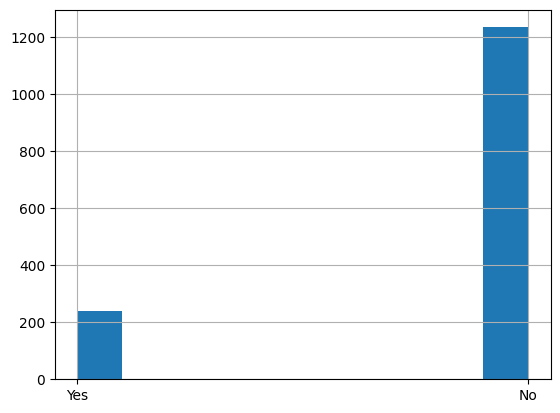

In [308]:
# Plot distribution of target variable
df_data['Migration'].hist()
print(df_data['Migration'].value_counts())

Dataset is biased toward no migration

In [309]:
# Finding list of numerical columns
# Selecting numerical columns
numerical_cols = df_data.select_dtypes(include=['int64','int32', 'float64', 'uint64']).columns
print("Numerical Columns:", numerical_cols.tolist())

Numerical Columns: ['CitizenSN', 'Age', 'Salary', 'Commute_Factor', 'Education', 'CitizenRegister', 'SurveySatisfaction', 'CompensationRate', 'CommunityEngagement', 'JobStatus', 'CitizenSatisfaction', 'MonthlyEarnings', 'BonusRate', 'TotNumEmployers', 'SalaryHike_over_2Y', 'Transactions_Grouping', 'PerformanceEvaluation', 'Work_Life_Balance', 'Years_Without_Major_Change', 'Years_Without_Minor_Change', 'Years_Since_Last_Target_Achievement', 'Years_in_Same_Group', 'RelationshipAssessment', 'TypicalHours', 'StockmarketParticipation', 'Total_Years_of_Work', 'Trainings_Last_2_Years']


Checking outliers in each column

In [310]:
for col in numerical_cols:
    # Interquartile Range (IQR) Method
    q1 = df_data[col].quantile(0.25)
    q3 = df_data[col].quantile(0.75)
    iqr = q3 - q1
    outliers_iqr = df_data[(df_data[col] < (q1 - 1.5 * iqr)) | (df_data[col] > (q3 + 1.5 * iqr))]

    print(f"Col Name - {col} :  Total % of outliers using IQR Method {200.0*(outliers_iqr.shape[0]/df_data.shape[0])}")

Col Name - CitizenSN :  Total % of outliers using IQR Method 0.0
Col Name - Age :  Total % of outliers using IQR Method 0.27192386131883073
Col Name - Salary :  Total % of outliers using IQR Method 0.0
Col Name - Commute_Factor :  Total % of outliers using IQR Method 0.0
Col Name - Education :  Total % of outliers using IQR Method 0.0
Col Name - CitizenRegister :  Total % of outliers using IQR Method 0.0
Col Name - SurveySatisfaction :  Total % of outliers using IQR Method 0.0
Col Name - CompensationRate :  Total % of outliers using IQR Method 0.0
Col Name - CommunityEngagement :  Total % of outliers using IQR Method 0.0
Col Name - JobStatus :  Total % of outliers using IQR Method 0.0
Col Name - CitizenSatisfaction :  Total % of outliers using IQR Method 0.0
Col Name - MonthlyEarnings :  Total % of outliers using IQR Method 15.49966009517335
Col Name - BonusRate :  Total % of outliers using IQR Method 0.0
Col Name - TotNumEmployers :  Total % of outliers using IQR Method 6.934058463630

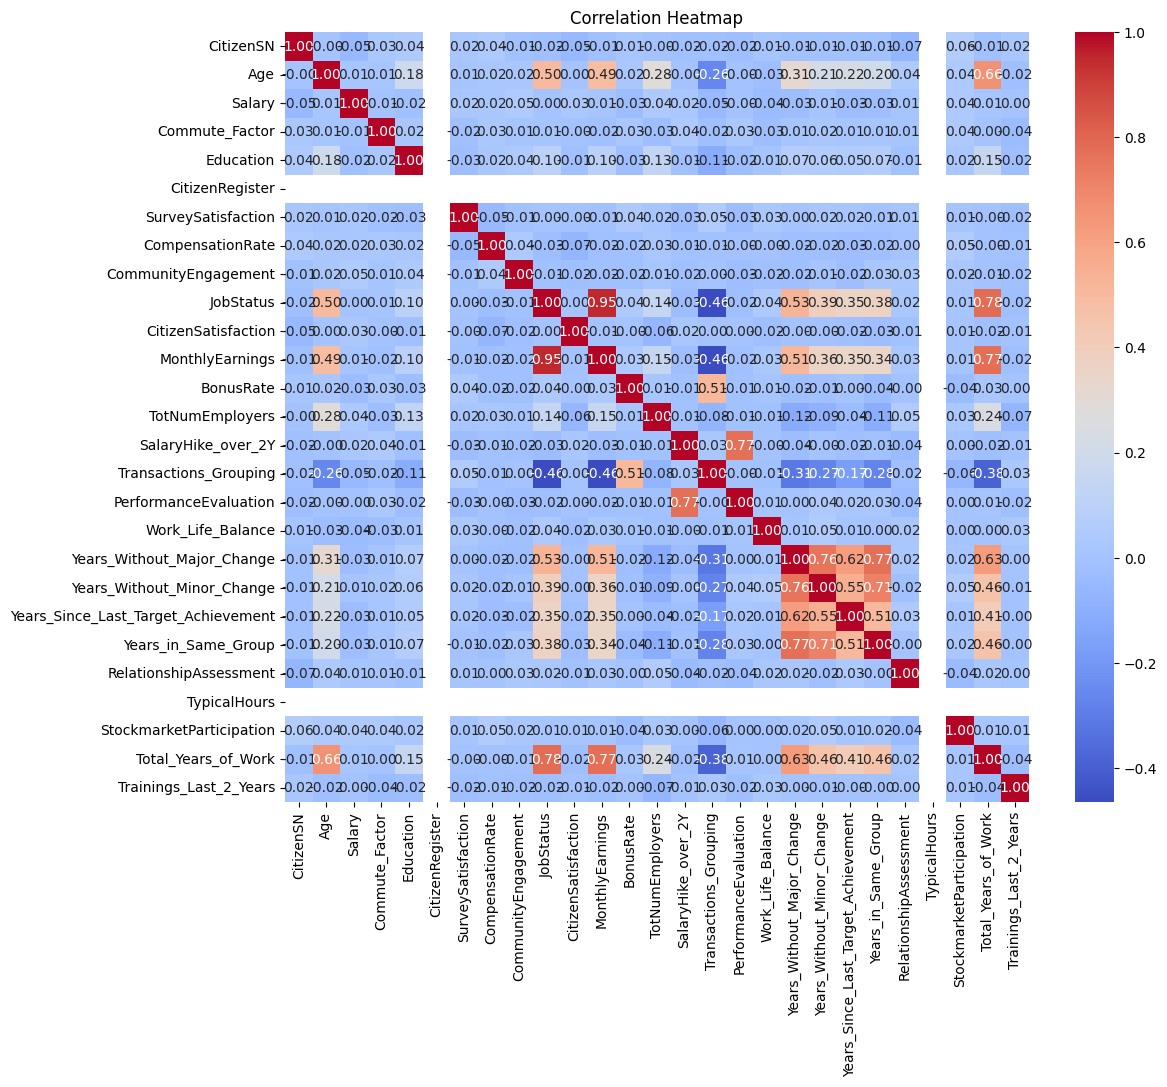

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_data[numerical_cols].corr()
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [312]:
corr_matrix

,CitizenSN,Age,Salary,Commute_Factor,Education,CitizenRegister,SurveySatisfaction,CompensationRate,CommunityEngagement,JobStatus,...,Work_Life_Balance,Years_Without_Major_Change,Years_Without_Minor_Change,Years_Since_Last_Target_Achievement,Years_in_Same_Group,RelationshipAssessment,TypicalHours,StockmarketParticipation,Total_Years_of_Work,Trainings_Last_2_Years
CitizenSN,1.000000,-0.000742,-0.049034,0.032082,0.043367,NaN,0.019956,0.036345,-0.008057,-0.018719,...,0.007451,-0.011528,-0.008889,-0.009861,-0.010336,-0.068192,NaN,0.063931,-0.013894,0.024653
Age,-0.000742,1.000000,0.012236,0.013321,0.184243,NaN,0.006251,0.023053,0.021913,0.500530,...,-0.027275,0.314401,0.214382,0.222540,0.198053,0.043445,NaN,0.041630,0.662028,-0.020251
Salary,-0.049034,0.012236,1.000000,-0.005654,-0.015970,NaN,0.019418,0.023887,0.045406,0.002583,...,-0.039094,-0.034296,0.009586,-0.033680,-0.027140,0.009027,NaN,0.043251,0.014672,0.003117
Commute_Factor,0.032082,0.013321,-0.005654,1.000000,0.020413,NaN,-0.017436,0.029997,0.009494,0.005247,...,-0.025099,0.009442,0.018845,0.010318,0.014661,0.005969,NaN,0.043849,0.004104,-0.037452
Education,0.043367,0.184243,-0.015970,0.020413,1.000000,NaN,-0.026242,0.017881,0.041666,0.100908,...,0.008962,0.069078,0.060326,0.053941,0.068754,-0.008237,NaN,0.019424,0.148727,-0.024926
CitizenRegister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SurveySatisfaction,0.019956,0.006251,0.019418,-0.017436,-0.026242,NaN,1.000000,-0.051663,-0.007985,0.000005,...,0.029423,0.000513,0.017194,0.016014,-0.006068,0.008190,NaN,0.005440,-0.003779,-0.019015
CompensationRate,0.036345,0.023053,0.023887,0.029997,0.017881,NaN,-0.051663,1.000000,0.042147,-0.029585,...,-0.001405,-0.019791,-0.023861,-0.026140,-0.020168,0.003089,NaN,0.053986,-0.002046,-0.007999
CommunityEngagement,-0.008057,0.021913,0.045406,0.009494,0.041666,NaN,-0.007985,0.042147,1.000000,-0.011721,...,-0.015589,-0.021233,0.008685,-0.024292,0.026299,0.032497,NaN,0.019392,-0.005864,-0.015977
JobStatus,-0.018719,0.500530,0.002583,0.005247,0.100908,NaN,0.000005,-0.029585,-0.011721,1.000000,...,0.038810,0.534448,0.389065,0.353856,0.375004,0.020979,NaN,0.012476,0.781258,-0.018699


In [313]:
print(df_data['CitizenRegister'].value_counts())
print(df_data['TypicalHours'].value_counts())

1    1471
Name: CitizenRegister, dtype: int64
80    1471
Name: TypicalHours, dtype: int64


In [314]:
# Summary of non-numeric columns
print(df_data.describe(include=[object]))

       Migration Gender  Travel_Habits                Job_Type EducationArea  \
count       1471   1471           1471                    1471          1471   
unique         2      2              3                       3             6   
top           No   Male  Travel-Seldom  Research & Development       Science   
freq        1233    882           1042                     959           607   

          JobFunction Marriage_Data Adult Work_Overtime  
count            1471          1471  1471          1471  
unique              9             3     1             2  
top     Sales Manager       Married     Y            No  
freq              327           673  1471          1056  


<Figure size 1200x400 with 0 Axes>

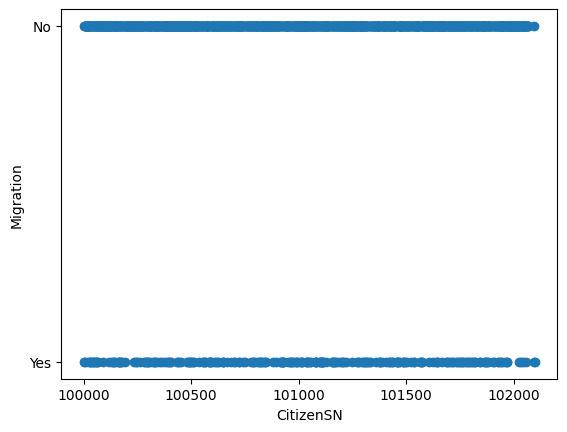

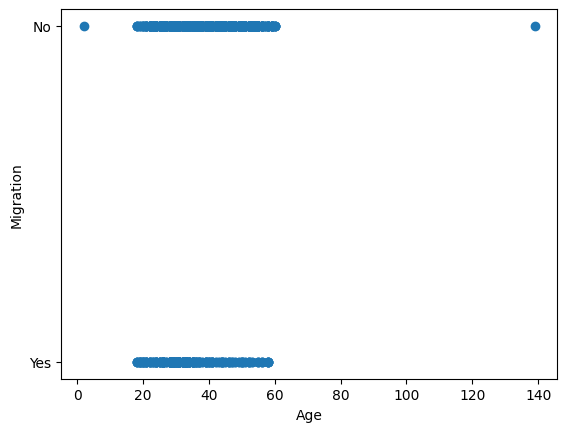

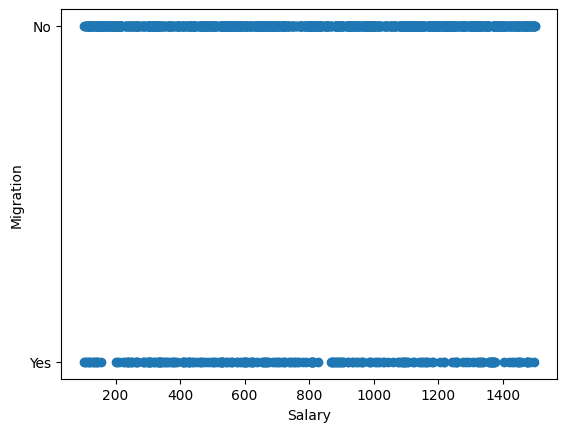

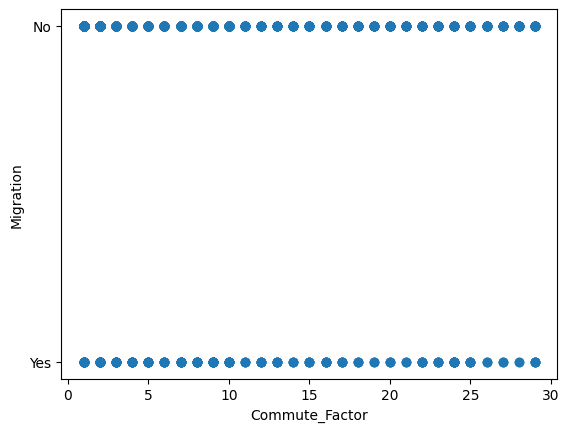

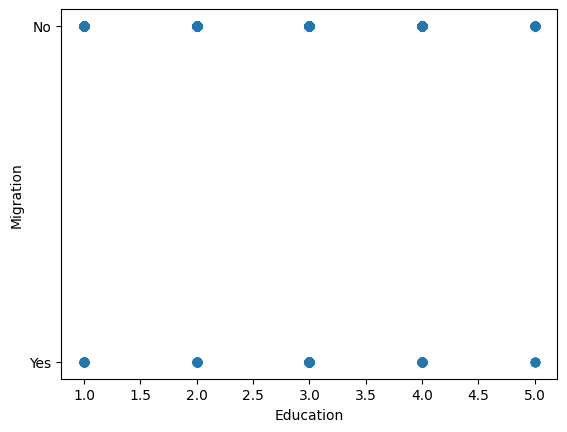

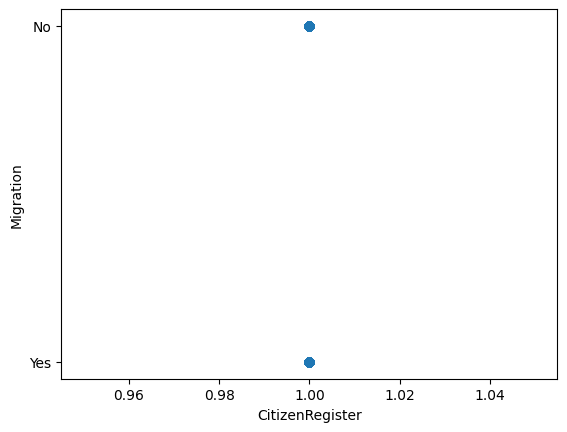

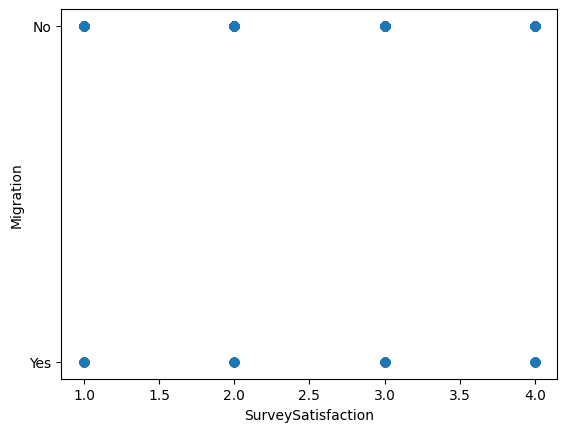

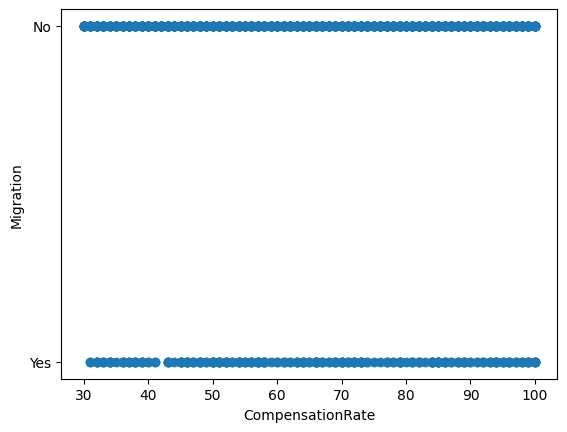

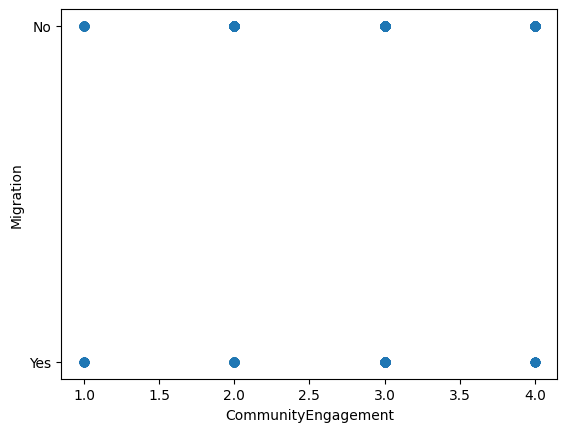

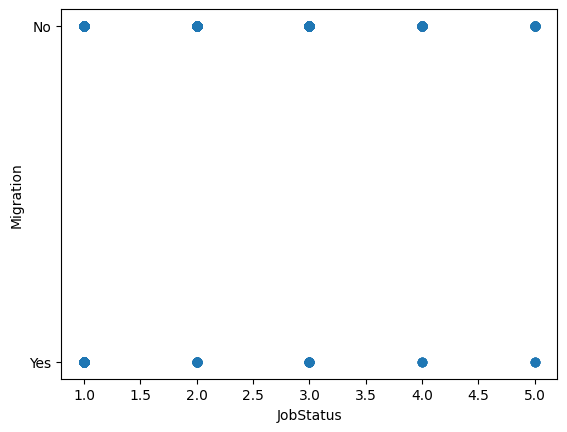

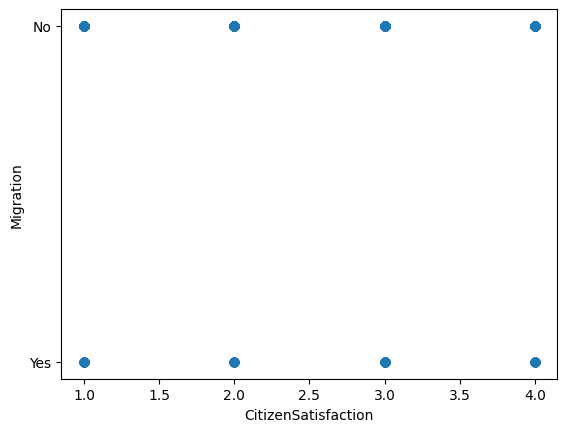

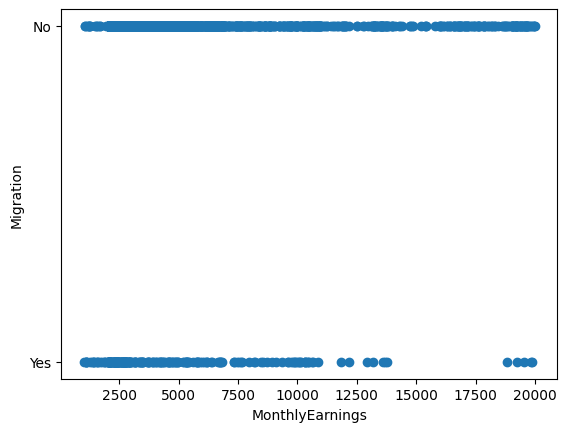

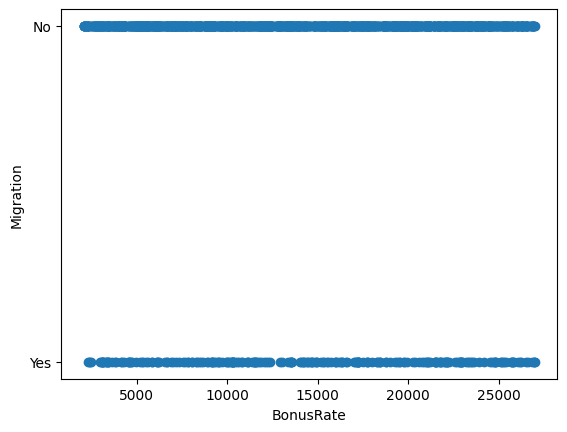

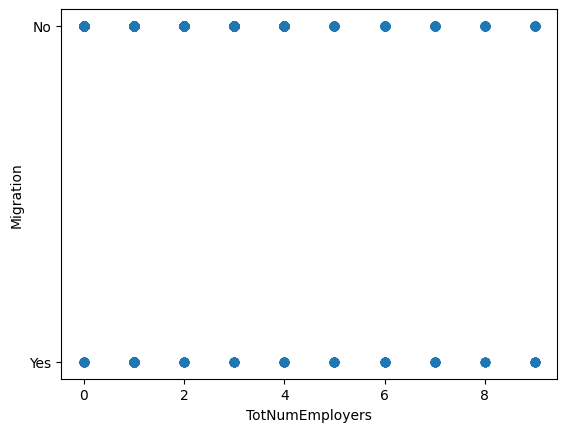

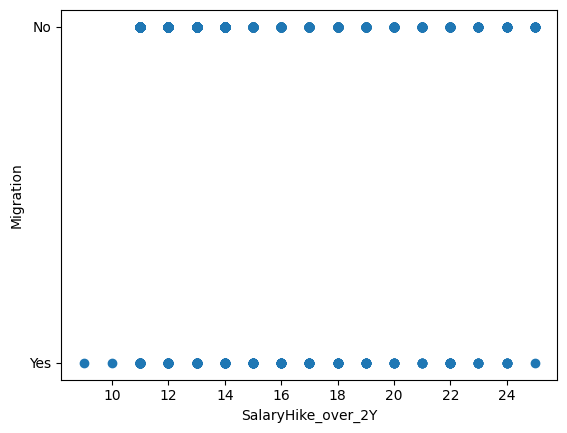

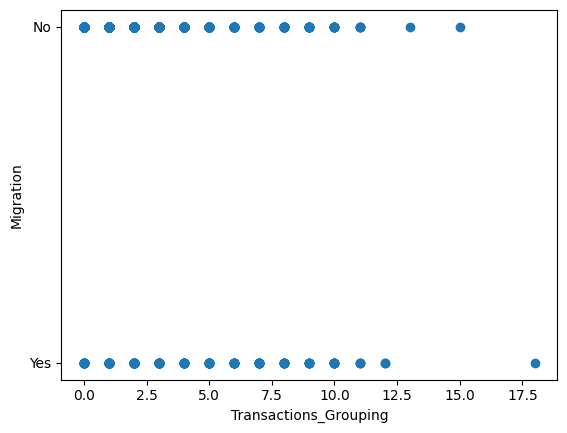

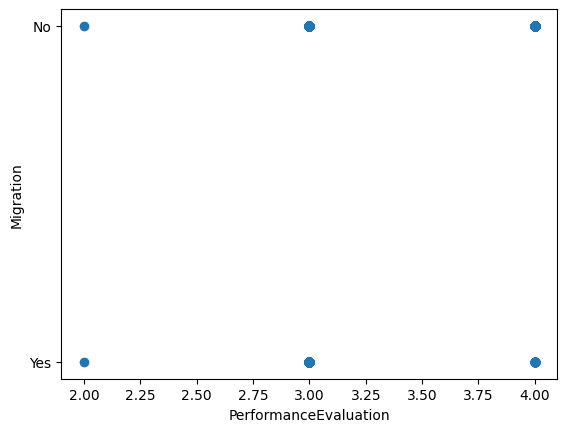

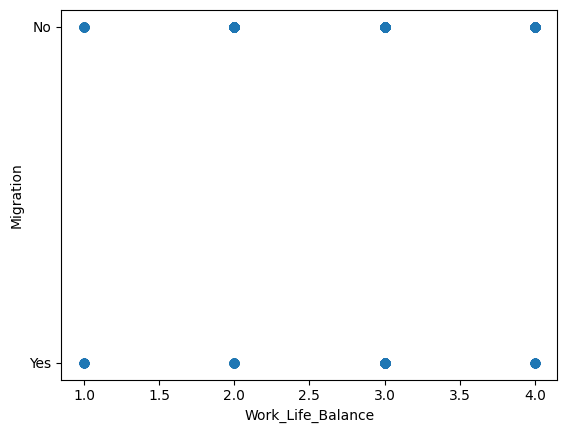

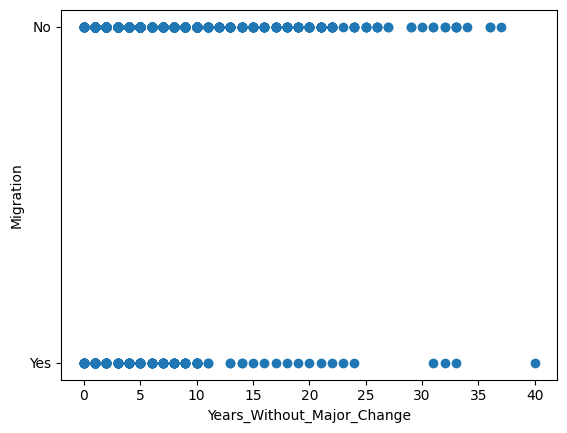

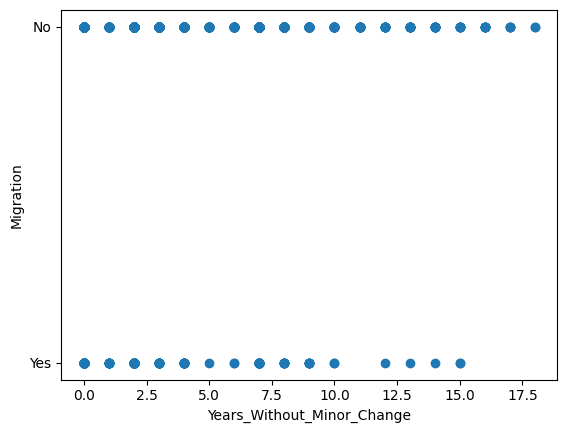

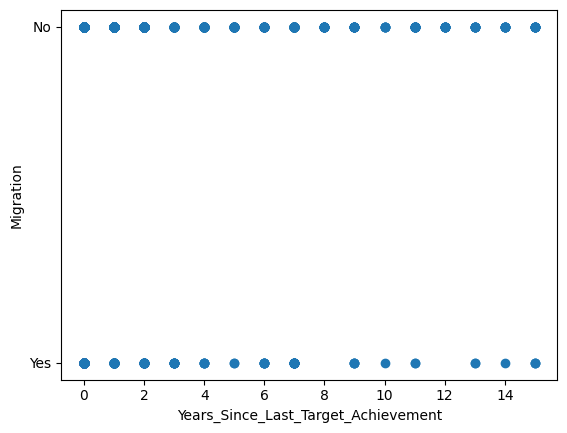

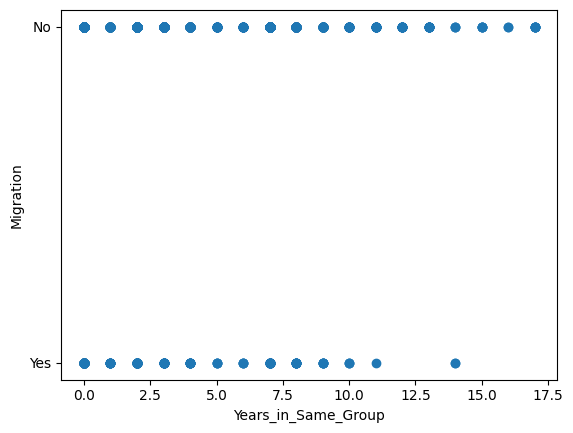

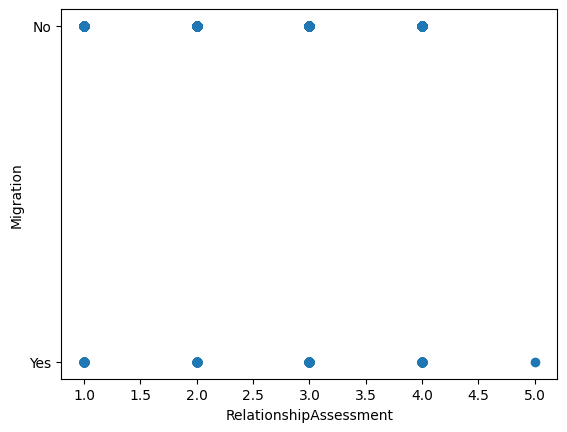

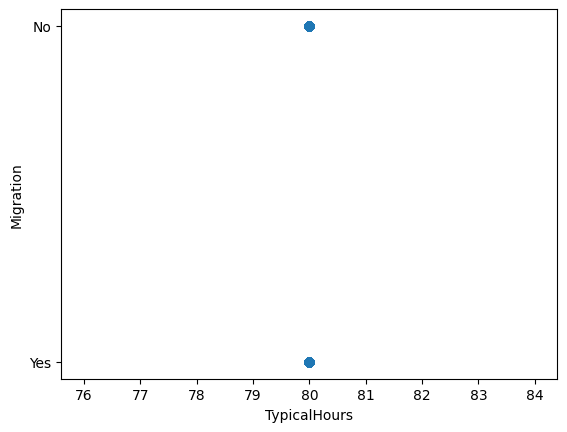

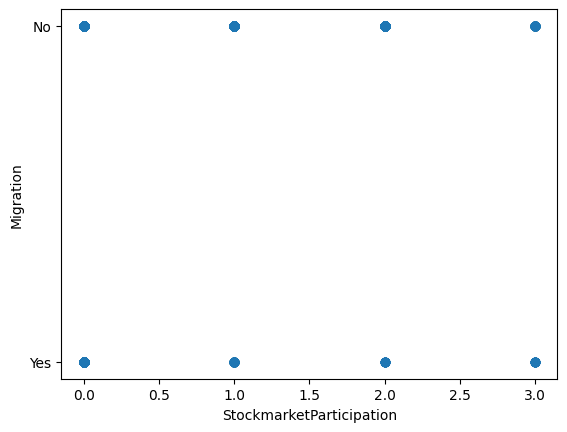

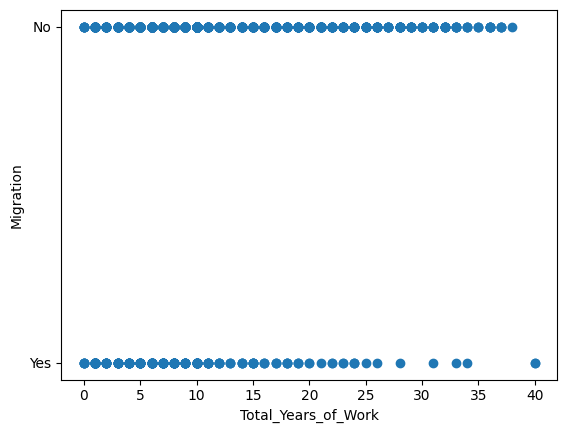

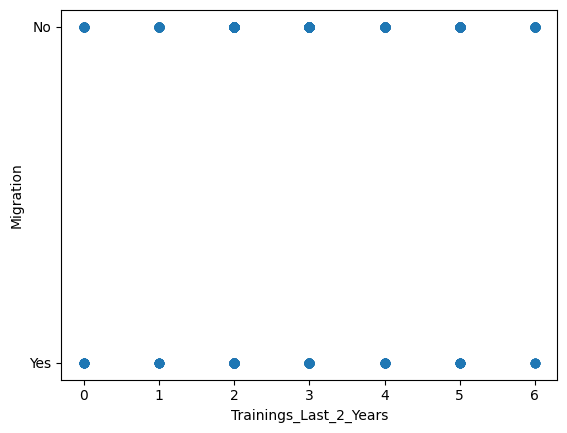

In [315]:

# Create scatter plots
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_cols):
    plt.figure()  # Create a new figure
    plt.scatter(df_data[feature], df_data['Migration'])
    plt.xlabel(feature)
    plt.ylabel('Migration')
    plt.show()


#### Feature Engineering

Getting feature importance for numerical column

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# Random Forest for feature importances
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(df_data[numerical_cols], df_data['Migration'])

# Select features using feature importances
importances = forest.feature_importances_

# Get feature importances
importances = forest.feature_importances_

# Match feature importances with column names
feature_importances = pd.DataFrame(importances, index=numerical_cols, columns=["importance"]).sort_values("importance", ascending=False)

print(feature_importances)


                                     importance
MonthlyEarnings                        0.081392
Age                                    0.066427
CitizenSN                              0.064948
BonusRate                              0.061217
Total_Years_of_Work                    0.060164
Salary                                 0.058314
Commute_Factor                         0.056223
CompensationRate                       0.054084
SalaryHike_over_2Y                     0.043744
Years_Without_Major_Change             0.041949
TotNumEmployers                        0.037184
Transactions_Grouping                  0.036104
StockmarketParticipation               0.035465
Years_in_Same_Group                    0.031598
SurveySatisfaction                     0.031135
CitizenSatisfaction                    0.030032
Trainings_Last_2_Years                 0.029324
Years_Since_Last_Target_Achievement    0.029080
CommunityEngagement                    0.027870
Years_Without_Minor_Change             0

In [317]:
# Select top 10 numerical features
top_10_numerical_features = feature_importances[0:11].index.to_list()

Apply label encoder to all categorical columns

In [318]:
# Pop target column 
df_target = df_data.pop('Migration')

In [319]:
# Import label encoder 
from sklearn import preprocessing

# Select columns with object or category data types
categorical_cols = df_data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in categorical cols
for each_col in categorical_cols:
   df_data[each_col]= label_encoder.fit_transform(df_data[each_col])
print(df_data[categorical_cols]) 


Index(['Gender', 'Travel_Habits', 'Job_Type', 'EducationArea', 'JobFunction',
       'Marriage_Data', 'Adult', 'Work_Overtime'],
      dtype='object')
      Gender  Travel_Habits  Job_Type  EducationArea  JobFunction  \
0          0              2         2              4            8   
1          1              1         1              4            0   
2          1              2         1              3            3   
3          0              1         1              4            0   
4          1              2         1              2            3   
...      ...            ...       ...            ...          ...   
1467       1              1         2              2            8   
1468       1              2         1              2            3   
1469       1              1         2              3            0   
1470       0              2         2              3            7   
1471       1              1         2              4            8   

      Marriage_Data 

Apply standard scaling to all columns

In [320]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)

print(df_scaled)

      CitizenSN    Gender       Age    Salary  Travel_Habits  Job_Type  \
0     -1.700931 -1.223705  0.421294  0.741352       0.591628  1.395903   
1     -1.699271  0.817191  1.258192 -1.298433      -0.911454 -0.496607   
2     -1.695952  0.817191  0.002845  1.413019       0.591628 -0.496607   
3     -1.694292 -1.223705 -0.415604  1.460110      -0.911454 -0.496607   
4     -1.690972  0.817191 -1.043278 -0.525149       0.591628 -0.496607   
...         ...       ...       ...       ...            ...       ...   
1466   1.725197  0.817191  1.258192  0.545553      -0.911454  1.395903   
1467   1.730177  0.817191 -0.310992 -0.433445       0.591628 -0.496607   
1468   1.770016  0.817191 -0.624829  0.716567      -0.911454  1.395903   
1469   1.776656 -1.223705 -0.834053  0.922281       0.591628  1.395903   
1470   1.779976  0.817191  1.572029  1.108167      -0.911454  1.395903   

      Commute_Factor  Education  EducationArea  CitizenRegister  ...  \
0          -1.010841  -0.892372       0

Split dataset into train and test

In [321]:
from sklearn.model_selection import train_test_split
y= df_target
X= df_data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [322]:
print(f'Total rows in train dataset - {X_train.shape[0]}')
print(f'Total rows in test dataset - {X_test.shape[0]}')

Total rows in train dataset - 1103
Total rows in test dataset - 368


#### Train Model

In [323]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [324]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=700, random_state=42,criterion = 'entropy')

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)

report_rf_text = classification_report(y_test, y_pred)
report_rf_json = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf_text)


Accuracy: 0.8614130434782609

Classification Report:
               precision    recall  f1-score   support

          No       0.86      1.00      0.92       308
         Yes       1.00      0.15      0.26        60

    accuracy                           0.86       368
   macro avg       0.93      0.57      0.59       368
weighted avg       0.88      0.86      0.82       368



Weight of all features

In [325]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                Feature  Importance
17                      MonthlyEarnings    0.062875
2                                   Age    0.059292
3                                Salary    0.052537
0                             CitizenSN    0.051680
21                        Work_Overtime    0.049901
18                            BonusRate    0.047308
33                  Total_Years_of_Work    0.047204
6                        Commute_Factor    0.046568
11                     CompensationRate    0.042800
26           Years_Without_Major_Change    0.040524
22                   SalaryHike_over_2Y    0.034192
23                Transactions_Grouping    0.033787
10                   SurveySatisfaction    0.032238
19                      TotNumEmployers    0.030378
14                          JobFunction    0.029842
32             StockmarketParticipation    0.029535
29                  Years_in_Same_Group    0.028332
27           Years_Without_Minor_Change    0.026048
15          

Find 20% of the top features

In [326]:
print(f'Total Features - {importance_df.shape[0]}')
top_features = importance_df[0: int(importance_df.shape[0]*0.2)]['Feature']
print(f"Top 20% features - {top_features}")

Total Features - 35
Top 20% features - 17        MonthlyEarnings
2                     Age
3                  Salary
0               CitizenSN
21          Work_Overtime
18              BonusRate
33    Total_Years_of_Work
Name: Feature, dtype: object


Retrain model

In [327]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=700, random_state=42,criterion = 'entropy')


# Train the model
rf.fit(X_train[top_features], y_train)

# Predict on the test set
y_pred = rf.predict(X_test[top_features])

# Evaluate the model
accuracy_rf2 = accuracy_score(y_test, y_pred)
report_rf2_text = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_rf2)
print("\nClassification Report:\n", report_rf2_text)


Accuracy: 0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.98      0.91       308
         Yes       0.61      0.18      0.28        60

    accuracy                           0.85       368
   macro avg       0.74      0.58      0.60       368
weighted avg       0.82      0.85      0.81       368



The selection of top 20 features do not help much

#### Building various models

In [328]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


##### KNN

In [329]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn_text = classification_report(y_test, y_pred_knn)
report_knn_json = classification_report(y_test, y_pred_knn,output_dict=True)

print("K-NN Accuracy:", accuracy_knn)
print("\nK-NN Classification Report:\n", report_knn_text)


K-NN Accuracy: 0.8179347826086957

K-NN Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.96      0.90       308
         Yes       0.32      0.10      0.15        60

    accuracy                           0.82       368
   macro avg       0.58      0.53      0.52       368
weighted avg       0.76      0.82      0.78       368



SVM

In [330]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm_text = classification_report(y_test, y_pred_svm)
report_svm_json = classification_report(y_test, y_pred_svm, output_dict=True)

print("SVM Accuracy:", accuracy_svm)
print("\nSVM Classification Report:\n", report_svm_text)


SVM Accuracy: 0.8369565217391305

SVM Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91       308
         Yes       0.00      0.00      0.00        60

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.70      0.84      0.76       368



c:\Users\Nabee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nabee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nabee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Naive Bayes Classifier

In [331]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred_nb = naive_bayes.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb_text = classification_report(y_test, y_pred_nb)
report_nb_json = classification_report(y_test, y_pred_nb, output_dict=True)

print("Naive Bayes Accuracy:", accuracy_nb)
print("\nNaive Bayes Classification Report:\n", report_nb_text)


Naive Bayes Accuracy: 0.7690217391304348

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.81      0.85       308
         Yes       0.37      0.58      0.45        60

    accuracy                           0.77       368
   macro avg       0.64      0.69      0.65       368
weighted avg       0.82      0.77      0.79       368



Decision Tree

In [332]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree_text = classification_report(y_test, y_pred_tree)
report_tree_json = classification_report(y_test, y_pred_tree, output_dict=True)

print("Decision Tree Accuracy:", accuracy_tree)
print("\nDecision Tree Classification Report:\n", report_tree_text)


Decision Tree Accuracy: 0.7581521739130435

Decision Tree Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.85      0.85       308
         Yes       0.27      0.28      0.28        60

    accuracy                           0.76       368
   macro avg       0.56      0.57      0.57       368
weighted avg       0.76      0.76      0.76       368



MLP Classifier

In [333]:
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

report_mlp_text = classification_report(y_test, y_pred_mlp)
report_mlp_json = classification_report(y_test, y_pred_mlp, output_dict=True)

print("MLP Classifier Accuracy:", accuracy_mlp)
print("\nMLP Classifier Classification Report:\n", report_mlp_text)


MLP Classifier Accuracy: 0.7771739130434783

MLP Classifier Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87       308
         Yes       0.21      0.13      0.16        60

    accuracy                           0.78       368
   macro avg       0.53      0.52      0.52       368
weighted avg       0.74      0.78      0.76       368



Summary of results

In [334]:
import pandas as pd

# Create DataFrames for each model's results
results = []

# Accuracy and Classification Report for each model
model_names = ["Random Forest","K-NN", "SVM", "Naive Bayes", "Decision Tree", "MLP Classifier"]
accuracies = [accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb, accuracy_tree, accuracy_mlp]
classification_reports = [report_rf_json, report_knn_json, report_svm_json,\
                           report_nb_json, report_tree_json, report_mlp_json]

for model_name, accuracy, classification_report_text in zip(model_names, accuracies, classification_reports):
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Weighted Precision": classification_report_text['weighted avg']['precision'],
        "Weighted Recall": classification_report_text['weighted avg']['recall'],
        "Weighted F1-Score": classification_report_text['weighted avg']['f1-score']
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the combined results table
print(results_df)


            Model  Accuracy  Weighted Precision  Weighted Recall  \
0   Random Forest  0.861413            0.881101         0.861413   
1            K-NN  0.817935            0.758943         0.817935   
2             SVM  0.836957            0.700496         0.836957   
3     Naive Bayes  0.769022            0.820381         0.769022   
4   Decision Tree  0.758152            0.762955         0.758152   
5  MLP Classifier  0.777174            0.739397         0.777174   

   Weighted F1-Score  
0           0.815494  
1           0.776371  
2           0.762670  
3           0.788143  
4           0.760510  
5           0.756005  


In [336]:
import pandas as pd
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = results_df.columns

# Add rows from the DataFrame to the table
for row in results_df.itertuples(index=False):
    table.add_row(row)

# Print the beautiful table
print(table)


+----------------+--------------------+--------------------+--------------------+--------------------+
|     Model      |      Accuracy      | Weighted Precision |  Weighted Recall   | Weighted F1-Score  |
+----------------+--------------------+--------------------+--------------------+--------------------+
| Random Forest  | 0.8614130434782609 | 0.8811008840983409 | 0.8614130434782609 | 0.8154944266996936 |
|      K-NN      | 0.8179347826086957 | 0.7589434998983692 | 0.8179347826086957 | 0.7763708891753767 |
|      SVM       | 0.8369565217391305 | 0.7004962192816635 | 0.8369565217391305 | 0.7626704399279651 |
|  Naive Bayes   | 0.7690217391304348 | 0.8203808015020829 | 0.7690217391304348 | 0.7881427533415571 |
| Decision Tree  | 0.7581521739130435 | 0.7629552319858807 | 0.7581521739130435 | 0.7605097403552231 |
| MLP Classifier | 0.7771739130434783 | 0.739397406559878  | 0.7771739130434783 | 0.7560046507358564 |
+----------------+--------------------+--------------------+-------------